<a href="https://colab.research.google.com/github/Francis-Subasinghe/TrendCast/blob/main/MScProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 64.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/data.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholders Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Print the columns in your DataFrame to identify potential mismatches.
df.columns = df.columns.str.strip()
print(df.columns)


# Carefully review the column names in 'features_to_retain' and correct any typos or inconsistencies
# with the actual column names in your DataFrame.
features_to_retain = [
    'ROA(C) before interest and depreciation before interest',
    'Operating Gross Margin',
    'Operating Profit Rate',
    'Pre-tax net Interest Rate',
    'Operating Expense Rate',
    'Research and development expense rate',
    'Cash flow rate',
    'Interest-bearing debt interest rate',
    'Net Value Per Share (B)',
    'Current Ratio',
    'Net Income to Stockholders Equity'
]

# Now try creating your new DataFrame
featuresDF = df[features_to_retain]

Index(['Bankrupt?', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax

In [ ]:
featuresDF.shape


(6819, 11)

In [ ]:
featuresDF.dtypes

ROA(C) before interest and depreciation before interest    float64
Operating Gross Margin                                     float64
Operating Profit Rate                                      float64
Pre-tax net Interest Rate                                  float64
Operating Expense Rate                                     float64
Research and development expense rate                      float64
Cash flow rate                                             float64
Interest-bearing debt interest rate                        float64
Net Value Per Share (B)                                    float64
Current Ratio                                              float64
Net Income to Stockholders Equity                          float64
dtype: object

In [ ]:
featuresDF.describe()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Net Value Per Share (B),Current Ratio,Net Income to Stockholders Equity
count,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000
mean,0.505180,0.607948,0.998755,0.797190,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.190661,4.032850e+05,0.840402
std,0.060686,0.016934,0.013010,0.012869,3.237684e+09,2.598292e+09,0.017036,1.082750e+08,0.033390,3.330216e+07,0.014523
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.476527,0.600445,0.998969,0.797386,1.566870e-04,1.281880e-04,0.461558,2.030200e-04,0.173613,7.555047e-03,0.840115
50%,0.502706,0.605997,0.999022,0.797464,2.777590e-04,5.090000e+08,0.465080,3.210320e-04,0.184400,1.058717e-02,0.841179
75%,0.535563,0.613914,0.999095,0.797579,4.145000e+09,3.450000e+09,0.471004,5.325530e-04,0.199570,1.626953e-02,0.842357
max,1.000000,1.000000,1.000000,1.000000,9.990000e+09,9.980000e+09,1.000000,9.900000e+08,1.000000,2.750000e+09,1.000000


In [ ]:
print(featuresDF.columns)

Index(['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio', 'Net Income to Stockholders Equity'],
      dtype='object')


In [ ]:
featuresDF.isnull().sum()

ROA(C) before interest and depreciation before interest    0
Operating Gross Margin                                     0
Operating Profit Rate                                      0
Pre-tax net Interest Rate                                  0
Operating Expense Rate                                     0
Research and development expense rate                      0
Cash flow rate                                             0
Interest-bearing debt interest rate                        0
Net Value Per Share (B)                                    0
Current Ratio                                              0
Net Income to Stockholders Equity                          0
dtype: int64

In [ ]:
from pycaret.regression import setup, compare_models, tune_model

# Initialize PyCaret setup, disabling stratification
clf1 = setup(data=featuresDF, target='Net Income to Stockholders Equity', data_split_stratify=False)

# Train and compare all models, selecting the best one based on R2 score
best_model = compare_models(sort='R2')



,Description,Value
0,Session id,6901
1,Target,Net Income to Stockholders Equity
2,Target type,Regression
3,Original data shape,"(6819, 11)"
4,Transformed data shape,"(6819, 11)"
5,Transformed train set shape,"(4773, 11)"
6,Transformed test set shape,"(2046, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.0027,0.0002,0.0089,0.3963,0.0056,0.0032,0.3950
et,Extra Trees Regressor,0.0012,0.0002,0.0096,0.1445,0.0060,0.0013,1.7280
omp,Orthogonal Matching Pursuit,0.0027,0.0002,0.0109,-0.0030,0.0068,0.0031,0.0350
lr,Linear Regression,0.0027,0.0002,0.0109,-0.0033,0.0068,0.0031,0.6360
lasso,Lasso Regression,0.0027,0.0002,0.0109,-0.0033,0.0068,0.0031,0.0640
en,Elastic Net,0.0027,0.0002,0.0109,-0.0033,0.0068,0.0031,0.0550
llar,Lasso Least Angle Regression,0.0027,0.0002,0.0109,-0.0033,0.0068,0.0031,0.0340
dummy,Dummy Regressor,0.0027,0.0002,0.0109,-0.0045,0.0068,0.0031,0.0250
rf,Random Forest Regressor,0.0012,0.0002,0.0094,-0.0318,0.0059,0.0013,5.1550
lightgbm,Light Gradient Boosting Machine,0.0016,0.0002,0.0114,-0.3078,0.0070,0.0018,1.6620


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
# print best_model parameters
print(best_model)



AdaBoostRegressor(estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=6901)


In [ ]:
# tune the best model
tuned_best_model = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0014,0.0000,0.0037,0.5509,0.0020,0.0017
1,0.0015,0.0000,0.0030,0.7336,0.0016,0.0018
2,0.0028,0.0012,0.0346,0.2021,0.0257,0.0014
3,0.0012,0.0000,0.0023,0.7874,0.0012,0.0015
4,0.0016,0.0000,0.0055,0.5140,0.0030,0.0020
5,0.0020,0.0001,0.0071,0.4192,0.0039,0.0024
6,0.0014,0.0000,0.0026,0.8532,0.0015,0.0017
7,0.0024,0.0003,0.0159,0.4426,0.0099,0.0037
8,0.0015,0.0000,0.0026,0.7772,0.0014,0.0018


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


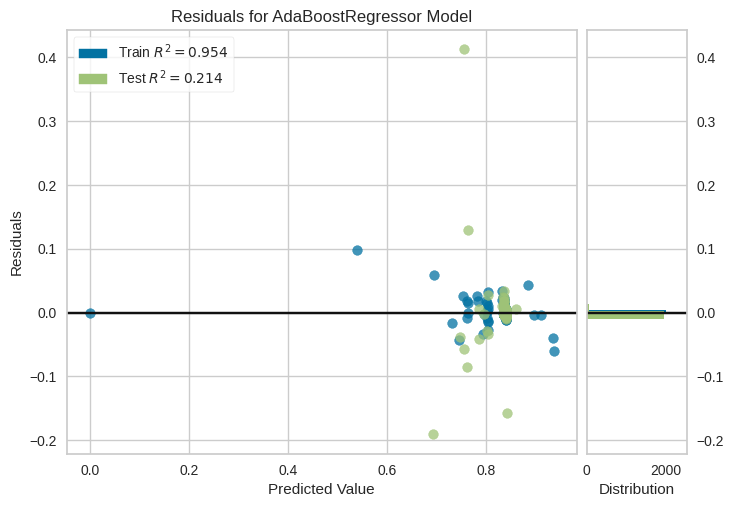

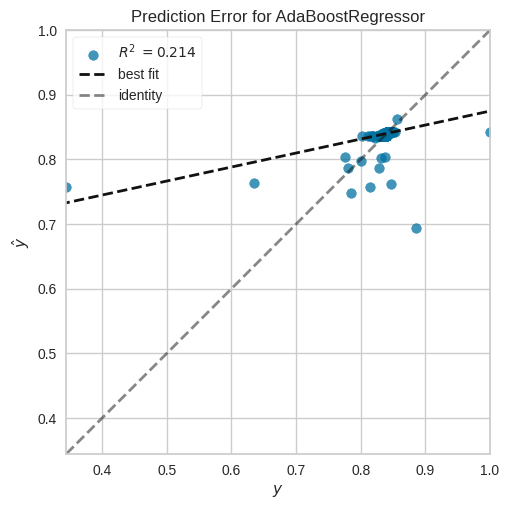

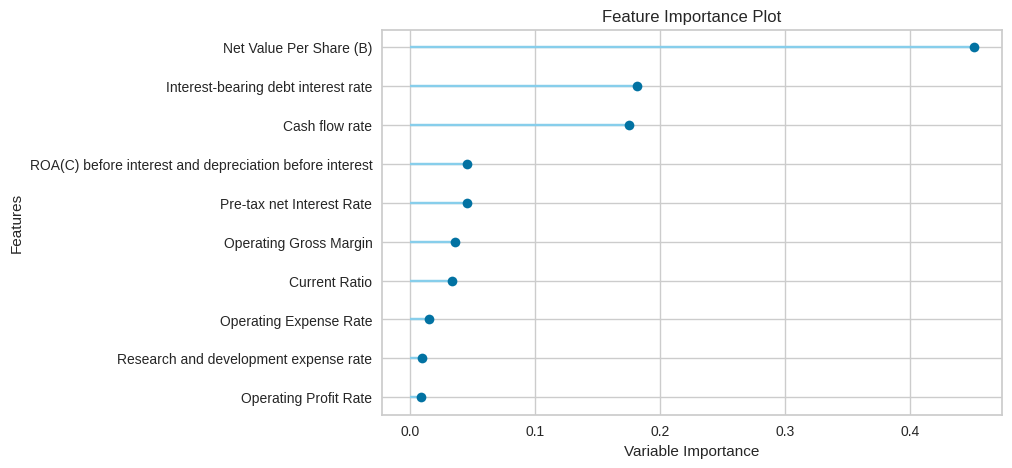

In [ ]:
from pycaret.regression import plot_model

# Plot residuals
plot_model(tuned_best_model, plot = 'residuals')

# Plot predicted vs actual values
plot_model(tuned_best_model, plot = 'error')

# Plot feature importance
plot_model(tuned_best_model, plot = 'feature')

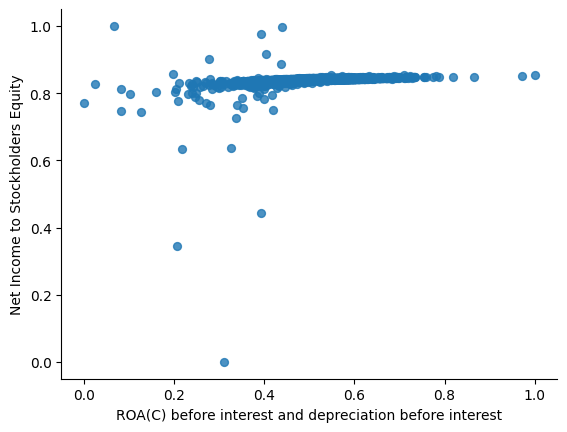

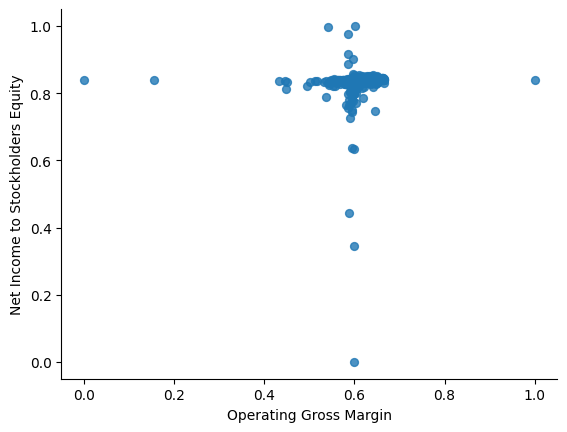

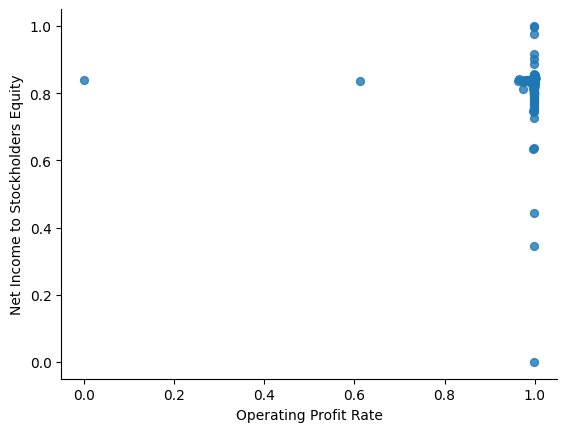

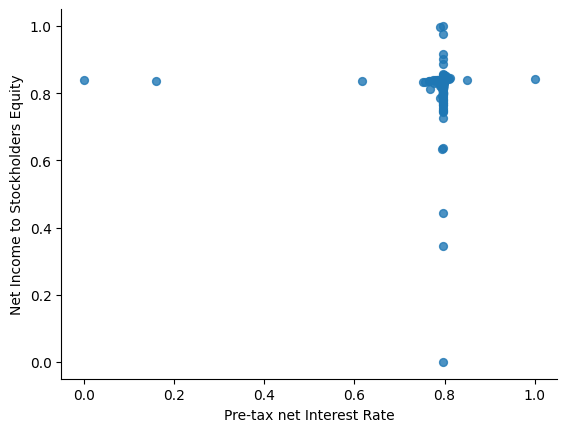

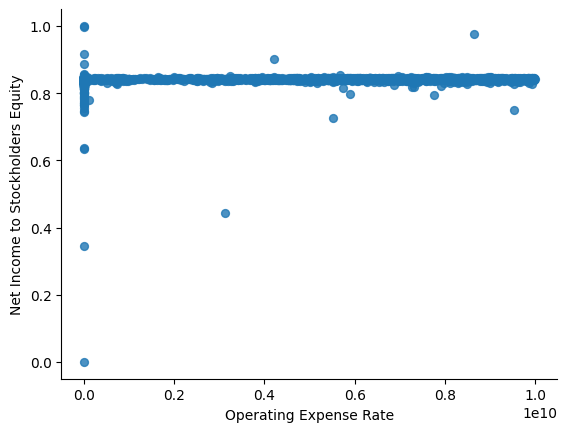

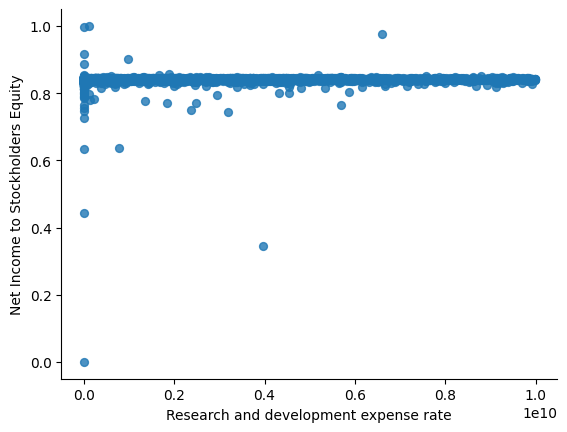

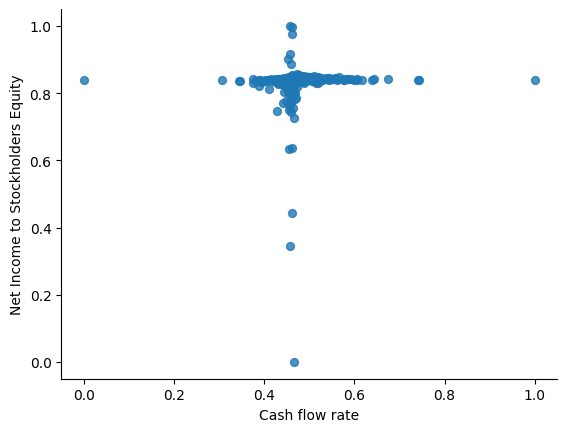

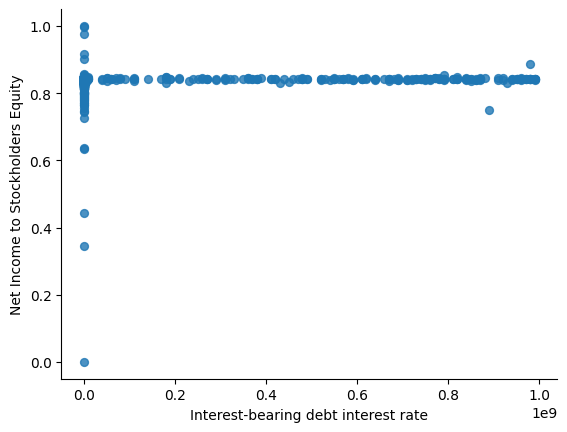

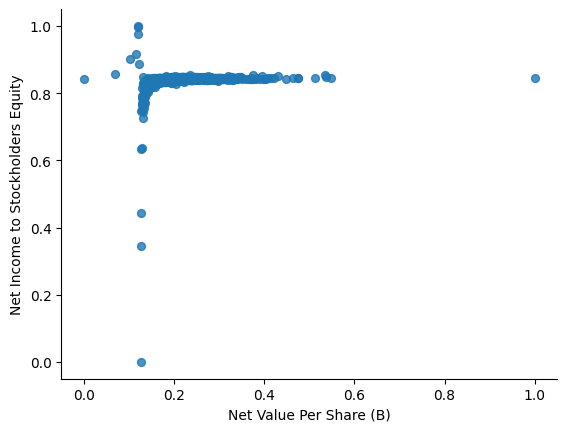

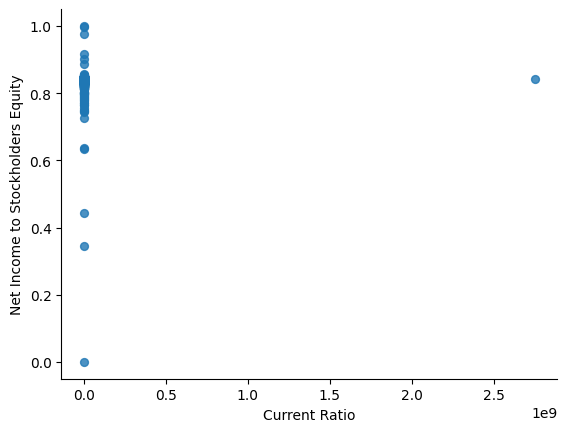

In [ ]:
df.plot(kind='scatter', x='ROA(C) before interest and depreciation before interest', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Gross Margin', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Profit Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Pre-tax net Interest Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Operating Expense Rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Research and development expense rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Cash flow rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Interest-bearing debt interest rate', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Net Value Per Share (B)', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Current Ratio', y='Net Income to Stockholders Equity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [ ]:
# Feature Selection
# We will select only those features which have association i.e., which majorly impacts our target variable
x = df[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]

#target variable
y = df["Net Income to Stockholders Equity"]

x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [ ]:
# Splitting into training set and testing set
# test_size=0.2 means the train set will be 80% and test set will be 20%
# random_state means that whenever we split the data it will split in same way as we have specified a number to it, the number can be anything
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Model Fitting
# We have selected Linear regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [ ]:
print(xtest)

[[4.34456199e-01 5.96325978e-01 9.98790914e-01 ... 0.00000000e+00
  1.74076103e-01 1.67387930e-02]
 [5.42534003e-01 6.03417461e-01 9.99040842e-01 ... 2.64026000e-04
  1.89077578e-01 9.77656900e-03]
 [5.84897382e-01 6.10566598e-01 9.99079204e-01 ... 0.00000000e+00
  1.86928490e-01 1.37703160e-02]
 ...
 [4.87788232e-01 6.06703758e-01 9.98974865e-01 ... 2.90029000e-04
  1.82040369e-01 6.79810700e-03]
 [4.49081071e-01 5.98906009e-01 9.98888667e-01 ... 4.92049000e-04
  2.00960769e-01 8.32134700e-03]
 [5.51796422e-01 6.33397714e-01 9.99041189e-01 ... 2.90000000e+08
  2.00876491e-01 7.72290900e-03]]


In [ ]:
# Change featuresDF.DataFrame to pd.DataFrame
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()})
print(data.head())

   Predicted Profit
0          0.835028
1          0.843041
2          0.845392
3          0.835386
4          0.840536


In [ ]:
# Predicting on Sample data from dataset
d1=df.sample(10)
d1=d1[['ROA(C) before interest and depreciation before interest',
       'Operating Gross Margin', 'Operating Profit Rate',
       'Pre-tax net Interest Rate', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Net Value Per Share (B)',
       'Current Ratio']]
d1=d1.to_numpy()
ypred1=model.predict(d1)
print(ypred1)

[[0.84127154]
 [0.84185024]
 [0.83881878]
 [0.83531573]
 [0.83997455]
 [0.83767193]
 [0.84099584]
 [0.83731957]
 [0.83372324]
 [0.83833128]]


In [ ]:
from sklearn import metrics
from tabulate import tabulate

# Assuming ytest and ypred are your true and predicted values
mae = metrics.mean_absolute_error(ytest, ypred)
mse = metrics.mean_squared_error(ytest, ypred)
r2 = metrics.r2_score(ytest, ypred)

# Create a table using tabulate
table = [
    ["Mean Absolute Error (MAE)", mae],
    ["Mean Squared Error (MSE)", mse],
    ["R-squared (R2)", r2]
]

# Print the table
print(tabulate(table, headers=["Metric", "Value"]))


Metric                          Value
-------------------------  ----------
Mean Absolute Error (MAE)  0.00208842
Mean Squared Error (MSE)   3.9911e-05
R-squared (R2)             0.163516
